### The Sparks Foundation-GRIP- Data science and Business Analytics Internship - Nov 2022

Task 1: Predication Using Supervised ML

Name : Santhosh B Dataset Link : http://bit.ly/w-data

Problem Statement(s); 
1.Import the libraries & Dataset
2.Data visualization
3.segregating the dataset into train & test
4.What will be preicted score if a student studies for 9.25 Hours a day

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
url='http://bit.ly/w-data'
data=pd.read_csv(url)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


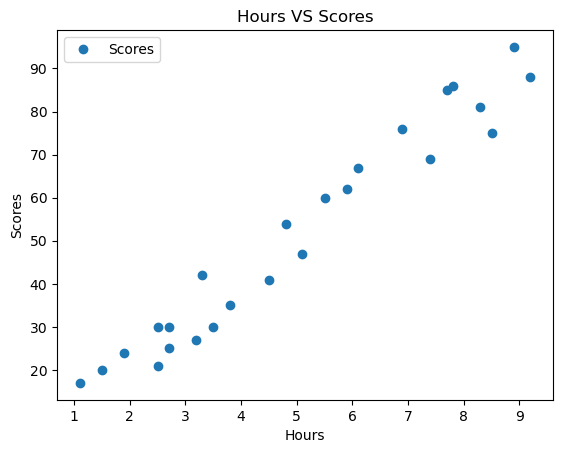

In [11]:
data.plot(x='Hours',y='Scores',style="o")
plt.title("Hours VS Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [12]:
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### In this step we divide the data into "attributes''as input and "lable" as outputs 

In [13]:
x=data.iloc[:,:-1].values 
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [14]:
y=data.iloc[:,1].values 
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Train_Test_Split 

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#### Training the algorithm

In [16]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [17]:
 data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [18]:
regressor.intercept_

2.018160041434662

In [19]:
regressor.coef_

array([9.91065648])

### Comparing the actual score and predicted score 

In [20]:
y_pred=regressor.predict(x_test)

In [21]:
data=pd.DataFrame({"actual":y_test,"Predicted":y_pred})
data

,actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Ploting the regression line 

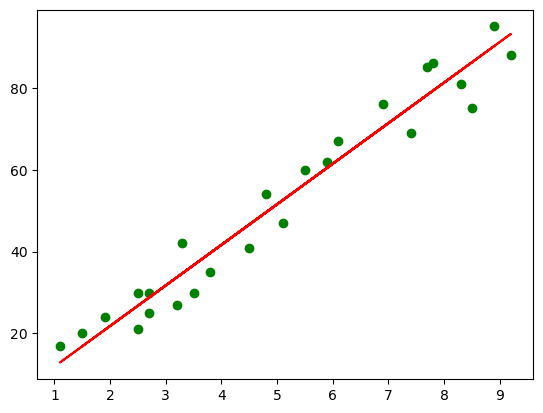

In [22]:
line=regressor.coef_*x+regressor.intercept_
plt.scatter(x,y,color='g')
plt.plot(x,line,color='r')
plt.show()

### Testing the accurcy of the model 

In [23]:
print('test accuracy:',regressor.score(x_train,y_train),'\nTest accuracy:',regressor.score(x_test,y_test))

test accuracy: 0.9515510725211552 
Test accuracy: 0.9454906892105354


In [24]:
 Hours=np.array([9.25])
Hours = Hours.reshape(-1,1)
own_pred=regressor.predict(Hours)
print("No of hours={}".format(Hours))
print("Predicted score=={}".format(own_pred))


No of hours=[[9.25]]
Predicted score==[93.69173249]


### Model Evaluation  

In [25]:
from sklearn import metrics
print("mean_absolute_error",metrics.mean_absolute_error(y_test,y_pred))

mean_absolute_error 4.183859899002982
